In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [3]:
new_data = pd.read_csv('Att2CleanData.csv')

In [4]:
x_new_data = new_data.drop(['GoodLoan'], axis=1)
y_new_data = new_data['GoodLoan']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_new_data, y_new_data, test_size=0.33, random_state=42)

In [6]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

print(clf.feature_importances_)

[ 0.01887085  0.          0.          0.          0.1372811   0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01062006  0.20787538  0.0011101   0.
  0.01857589  0.03811545  0.07787651  0.19415626  0.15424133  0.          0.
  0.          0.          0.01625395  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00268071  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.08374605  0.          0.
  0.          0.          0.02867404  0.          0.          0.          0.
  0.          0.00785143  0.00207089  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [7]:
feature_imp = clf.feature_importances_

In [8]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_new_data.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

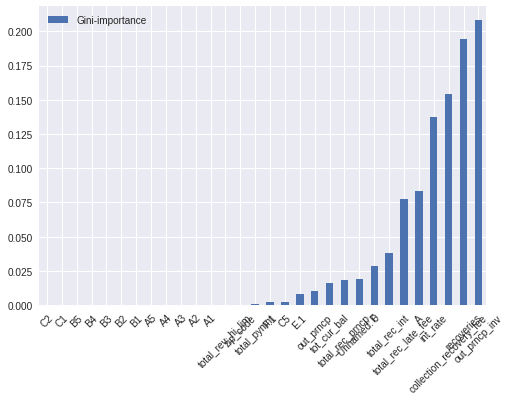

In [9]:
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance')[-30:].plot(kind='bar', rot=45)

In [12]:
y_true, y_pred = y_test, clf.predict(X_test)

In [16]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.00      0.01     18839
        1.0       0.93      1.00      0.96    250681

avg / total       0.94      0.93      0.90    269520



In [20]:
scores = []

for val in range(2, 10):
    clf01 = RandomForestClassifier(n_estimators = val)
    validated = cross_val_score(clf01, X_train, y_train, cv=10)
    scores.append(validated)

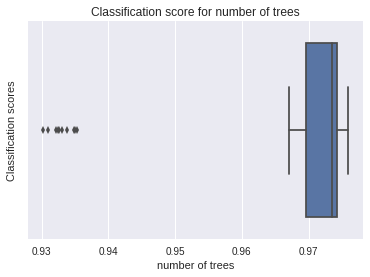

In [21]:
sns.boxplot(scores)
plt.xlabel('number of trees')
plt.ylabel('Classification scores')
plt.title('Classification score for number of trees')
plt.show()

In [22]:
print(scores)

[array([ 0.9348708 ,  0.93262308,  0.93300561,  0.93243787,  0.93216374,
        0.93028143,  0.93382675,  0.93530702,  0.9310307 ,  0.93506944]), array([ 0.97107196,  0.96964658,  0.97087042,  0.97052266,  0.97110746,
        0.97139985,  0.96986477,  0.97211257,  0.96990132,  0.97222222]), array([ 0.96791053,  0.96710647,  0.96836681,  0.96862208,  0.96761696,
        0.96942617,  0.96900585,  0.96898757,  0.96803728,  0.96964547]), array([ 0.97324659,  0.97251562,  0.97452532,  0.97394006,  0.97412281,
        0.97425073,  0.97377558,  0.97428728,  0.97298977,  0.97503655]), array([ 0.97342933,  0.97344761,  0.97414155,  0.97399488,  0.97457968,
        0.97483553,  0.97277047,  0.97430556,  0.97214912,  0.97476243]), array([ 0.97373999,  0.97348416,  0.97410501,  0.97412281,  0.97474415,
        0.97457968,  0.97342836,  0.97585892,  0.97346491,  0.97578582]), array([ 0.97397756,  0.97373999,  0.97512838,  0.97430556,  0.97516447,
        0.97584064,  0.97412281,  0.97510965,  0.97